---
## **Dealing with Data Inconsistancies/Anomalies using `Pandas` :**

## Types:
There are 5 major types of Data Inconsistencies/Anomalies:
1. **Inconsistent formats** (i.e date columns may have `dd/mm/yyyy` or `yyyy/mm/dd` or `dd mmm, yyyy`)
   
2. **Inconsistent Naming conventions** (i.e country column may have `USA`, `U.S.A`, `United States`, or `United States of America`)

3. **Typographical errors** (i.e name has spelling mistakes `Pakistan`, `pakistan`, `paaakisstann`, `pakuston`)

4. **Duplicates** (i.e one row may occure many times)

5. **Contradictory** (i.e logical contradiction, `son_age > father_age`)

> let's import a dataset which has inconsistencies or anomalies:

In [1]:
# importing libraries:
import pandas as pd
import numpy as np

In [2]:
data = {
    'date': ['2021-12-01', '01-12-2022', '2022/12/01', '12-01-2021'],
    'country': ['USA', 'U.S.A.', 'America', 'United States'],
    'name': ['Aammar', 'Amaar', 'Hamza', 'Hazma'],
    'sales_2020': [None, 200, None, 200],
    'sales_2021': [None, 150, 300, 150]
}
# make pandas dataframe
df = pd.DataFrame(data)

In [3]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,NaN,NaN
1,01-12-2022,U.S.A.,Amaar,200.0,150.0
2,2022/12/01,America,Hamza,NaN,300.0
3,12-01-2021,United States,Hazma,200.0,150.0


### We can see that we have:
1. Inconsistent format in `date` column
2. Inconsistent naming convention in `country` column
3. Typographical error in `name` column
4. `sales_2020`, `sales_2021` have duplicates and contradiction.


In [4]:
# let's work on country column first:
df['country'] = df['country'].replace({'U.S.A.' :'United States of America', 'USA' :'United States of America', 'United States' :'United States of America', 'America' :'United States of America'})
df['country']

0    United States of America
1    United States of America
2    United States of America
3    United States of America
Name: country, dtype: object

In [5]:
# now check the dataset, the country column is now consistent
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,NaN
1,01-12-2022,United States of America,Amaar,200.0,150.0
2,2022/12/01,United States of America,Hamza,NaN,300.0
3,12-01-2021,United States of America,Hazma,200.0,150.0


In [6]:
# now let's work on name column:

# let's work on country column first:
df['name'] = df['name'].replace({'Amaar' :'Aammar', 'Hazma' :'Hamza'})
df['name']

0    Aammar
1    Aammar
2     Hamza
3     Hamza
Name: name, dtype: object

In [7]:
# now check the dataset, the name column is now consistent
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,NaN
1,01-12-2022,United States of America,Aammar,200.0,150.0
2,2022/12/01,United States of America,Hamza,NaN,300.0
3,12-01-2021,United States of America,Hamza,200.0,150.0


In [8]:
# now let's work on sales_2020 and sales_2021 column:
df['sales_2020'] = df['sales_2020'].ffill()
df['sales_2021'] = df['sales_2021'].bfill()

In [9]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,150.0
1,01-12-2022,United States of America,Aammar,200.0,150.0
2,2022/12/01,United States of America,Hamza,200.0,300.0
3,12-01-2021,United States of America,Hamza,200.0,150.0


In [10]:
df['sales_2020'][0]

np.float64(nan)

In [11]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,150.0
1,01-12-2022,United States of America,Aammar,200.0,150.0
2,2022/12/01,United States of America,Hamza,200.0,300.0
3,12-01-2021,United States of America,Hamza,200.0,150.0


In [12]:
df.fillna(120)

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,120.0,150.0
1,01-12-2022,United States of America,Aammar,200.0,150.0
2,2022/12/01,United States of America,Hamza,200.0,300.0
3,12-01-2021,United States of America,Hamza,200.0,150.0


In [13]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,150.0
1,01-12-2022,United States of America,Aammar,200.0,150.0
2,2022/12/01,United States of America,Hamza,200.0,300.0
3,12-01-2021,United States of America,Hamza,200.0,150.0


In [14]:
# let's work on date column:

# standardizing the date format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,150.0
1,NaT,United States of America,Aammar,200.0,150.0
2,NaT,United States of America,Hamza,200.0,300.0
3,NaT,United States of America,Hamza,200.0,150.0


In [15]:
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [16]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,150.0
1,NaN,United States of America,Aammar,200.0,150.0
2,NaN,United States of America,Hamza,200.0,300.0
3,NaN,United States of America,Hamza,200.0,150.0


In [17]:
df['date'].fillna('2021-12-01', inplace=True)

C:\Users\Muhammad Faizan\AppData\Local\Temp\ipykernel_5116\3852720610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date'].fillna('2021-12-01', inplace=True)


In [18]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,United States of America,Aammar,NaN,150.0
1,2021-12-01,United States of America,Aammar,200.0,150.0
2,2021-12-01,United States of America,Hamza,200.0,300.0
3,2021-12-01,United States of America,Hamza,200.0,150.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4 non-null      object 
 1   country     4 non-null      object 
 2   name        4 non-null      object 
 3   sales_2020  3 non-null      float64
 4   sales_2021  4 non-null      float64
dtypes: float64(2), object(3)
memory usage: 292.0+ bytes


In [20]:
df['date'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4 non-null      object 
 1   country     4 non-null      object 
 2   name        4 non-null      object 
 3   sales_2020  3 non-null      float64
 4   sales_2021  4 non-null      float64
dtypes: float64(2), object(3)
memory usage: 292.0+ bytes


# Let's try this on a dataset:
* Importing adult dataset:


In [21]:
# importing dataset:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [40]:
# read the dataset
df = pd.read_csv('../dataset/adult/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### It shows that there are:
* 48842 rows 
* 15 columns 

In [45]:
df.isnull().sum().sort_values(ascending=False)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [46]:
df.replace('?', np.nan, inplace=True)

In [47]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [48]:
df.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
fnlwgt                0
education             0
educational-num       0
age                   0
marital-status        0
relationship          0
gender                0
race                  0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [49]:
# So, here we can see that there are missing values in the dataset.
#  occupation         2809/48842
#  workclass          2799/48842
#  native-country      857/48842

In [50]:
# let's see the percentage of missing values in the dataset
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values/df.shape[0])*100

print('The missing values are:\n', missing_values)
print('-------------------------------------')
print('Total percentage of missing values:\n', percentage_missing_values)


The missing values are:
 occupation         2809
workclass          2799
native-country      857
fnlwgt                0
education             0
educational-num       0
age                   0
marital-status        0
relationship          0
gender                0
race                  0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64
-------------------------------------
Total percentage of missing values:
 occupation         5.751198
workclass          5.730724
native-country     1.754637
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
age                0.000000
marital-status     0.000000
relationship       0.000000
gender             0.000000
race               0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
income             0.000000
dtype: float64


##### **Total percentage of missing values:**
* occupation     --->     5.751198
* workclass      --->     5.730724
* native-country --->     1.754637

In [53]:
# So, let's impute the missing values:
df.fillna(df.mode().iloc[0], inplace=True)

In [54]:
df.isnull().sum().sort_values(ascending=False)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#### Now, the missing values are imputed!

In [58]:
# let's see more incosistencies in the dataset:
df['education'].value_counts()
df['income'].value_counts()
df['native-country'].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

In [59]:

df['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [60]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [61]:
df['occupation'].value_counts()

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [56]:
# find percentage of income column in the dataset:
df['income'].value_counts(normalize=True)*100

income
<=50K    76.071823
>50K     23.928177
Name: proportion, dtype: float64

#### **Insights:**
* `75%` of the people have income less than 50K 
* `25%` of the people have income more than 50K

In [62]:
# show me the inconsistencies in the dataset:
df['income'] = df['income'].replace({'<=50K': '0', '>50K': '1'})
df['income'].value_counts()


income
0    37155
1    11687
Name: count, dtype: int64

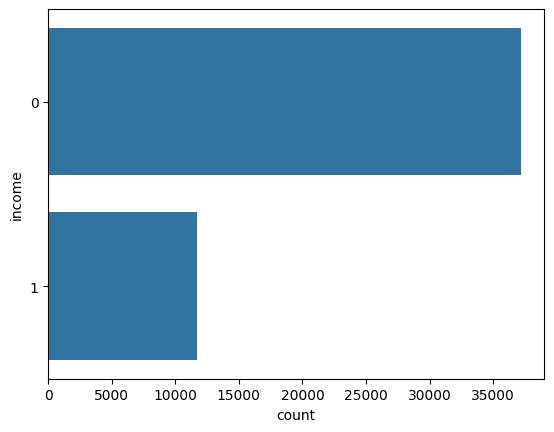

In [63]:
# let's see the distribution of the income column:
sns.countplot(df['income'])
plt.show()

In [64]:
# what are other inconsistencies in the dataset:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8024
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
i                   1
Name: count, dtype: int64

In [65]:
df['education'] = df['education'].replace({'Preschool': 'School', '1st-4th': 'School', '5th-6th': 'School', '7th-8th': 'School', '9th': 'School', '10th': 'School', '11th': 'School', '12th': 'School', 'HS-grad': 'School', 'Some-college': 'School', 'Assoc-acdm': 'School', 'Assoc-voc': 'School', 'Bachelors': 'College', 'Masters': 'College', 'Doctorate': 'College', 'Prof-school': 'College'})

In [66]:
df['education'].value_counts()

education
School     36732
College    12109
i              1
Name: count, dtype: int64

In [67]:
# let's remove the value 'i'from the education column:
df = df[df['education'] != 'i']
df['education'].value_counts()

education
School     36732
College    12109
Name: count, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48841 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48841 non-null  int64 
 1   workclass        48841 non-null  object
 2   fnlwgt           48841 non-null  int64 
 3   education        48841 non-null  object
 4   educational-num  48841 non-null  int64 
 5   marital-status   48841 non-null  object
 6   occupation       48841 non-null  object
 7   relationship     48841 non-null  object
 8   race             48841 non-null  object
 9   gender           48841 non-null  object
 10  capital-gain     48841 non-null  int64 
 11  capital-loss     48841 non-null  int64 
 12  hours-per-week   48841 non-null  int64 
 13  native-country   48841 non-null  object
 14  income           48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


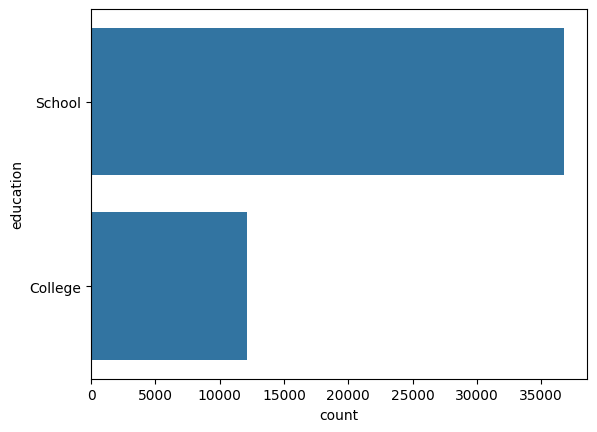

In [70]:
# let's see the distribution of the education column:
sns.countplot(df['education'])
plt.show()

In [72]:
# see for other inconsistencies in the dataset:
df['native-country'].value_counts()

# replacing '-' with a space in the native-country column:
df['native-country'] = df['native-country'].str.replace('-', ' ')


In [73]:
df['native-country'].value_counts() 

native-country
United States                 44688
Mexico                          951
Philippines                     295
Germany                         206
Puerto Rico                     184
Canada                          182
El Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador      

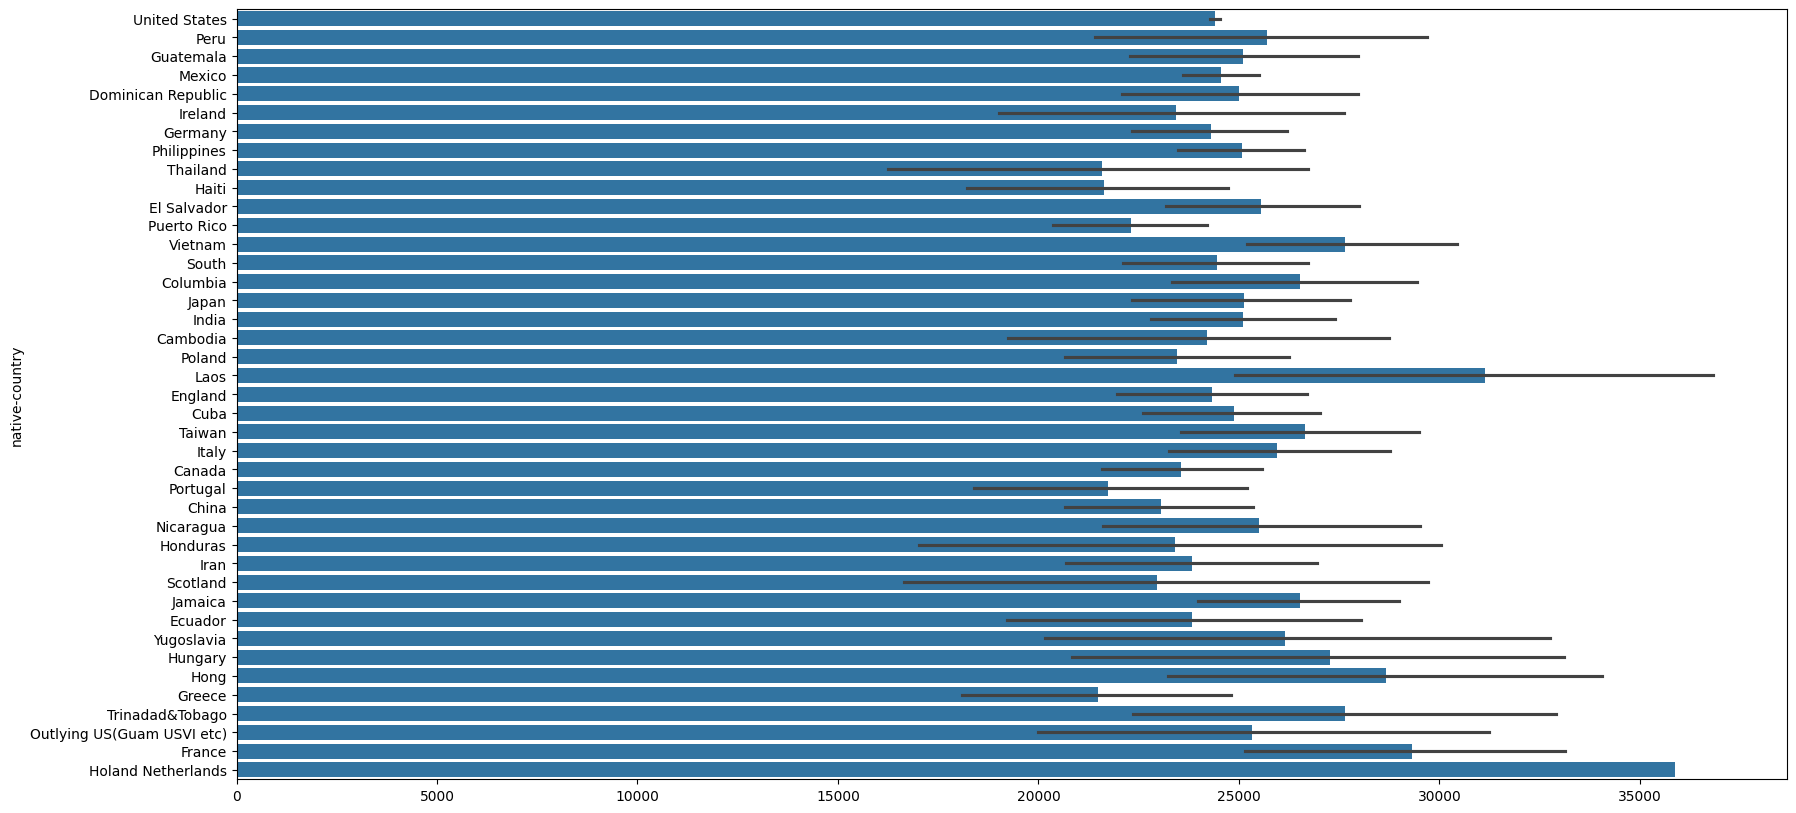

In [77]:
# show the distribution of the native-country column:
plt.figure(figsize=(20, 10))
sns.barplot(df['native-country'])
plt.show()

In [79]:
# see for other inconsistencies in the dataset:

df['occupation'].value_counts() 

# replacing '-' with a space in the occupation column:
df['occupation'] = df['occupation'].str.replace('-', ' ')


In [80]:
df['occupation'].value_counts()

occupation
Prof specialty       8981
Craft repair         6112
Exec managerial      6086
Adm clerical         5611
Sales                5503
Other service        4923
Machine op inspct    3022
Transport moving     2355
Handlers cleaners    2072
Farming fishing      1490
Tech support         1446
Protective serv       983
Priv house serv       242
Armed Forces           15
Name: count, dtype: int64

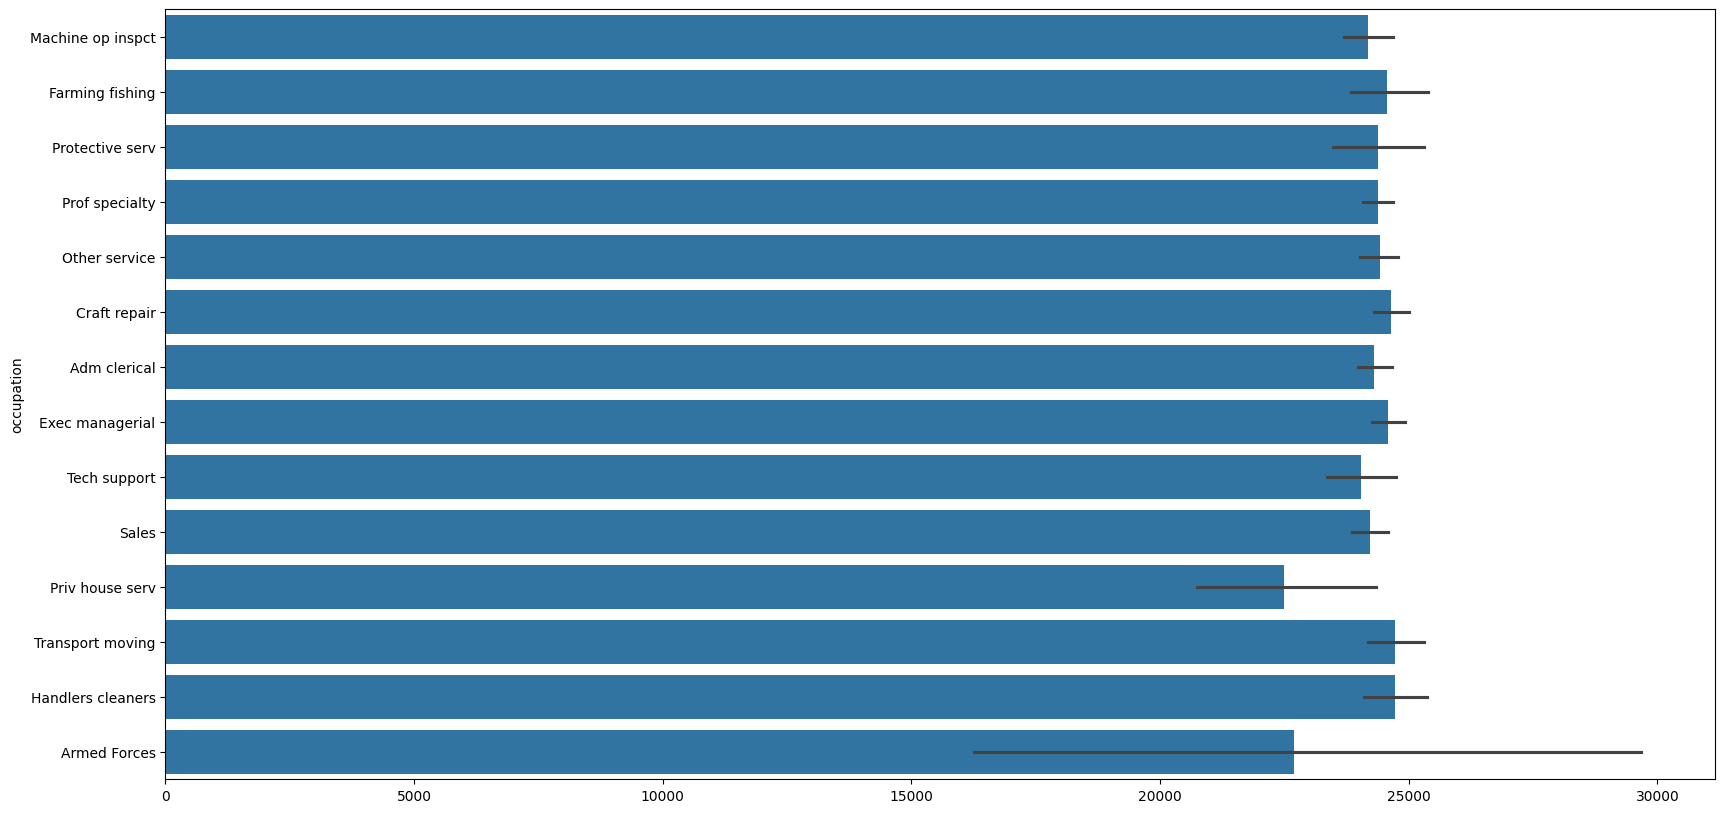

In [81]:
# show the distribution of the occupation column:
plt.figure(figsize=(20, 10))
sns.barplot(df['occupation'])
plt.show()

In [82]:
# see for incosistancies in workclass column:
df['workclass'].value_counts()

# replacing '-' with a space in the workclass column:
df['workclass'] = df['workclass'].str.replace('-', ' ')

df['workclass'].value_counts()

workclass
Private             36704
Self emp not inc     3862
Local gov            3136
State gov            1981
Self emp inc         1695
Federal gov          1432
Without pay            21
Never worked           10
Name: count, dtype: int64

In [83]:
# most of the inconsistencies are resolved now, let's see the dataset:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,School,7,Never-married,Machine op inspct,Own-child,Black,Male,0,0,40,United States,0
1,38,Private,89814,School,9,Married-civ-spouse,Farming fishing,Husband,White,Male,0,0,50,United States,0
2,28,Local gov,336951,School,12,Married-civ-spouse,Protective serv,Husband,White,Male,0,0,40,United States,1
3,44,Private,160323,School,10,Married-civ-spouse,Machine op inspct,Husband,Black,Male,7688,0,40,United States,1
4,18,Private,103497,School,10,Never-married,Prof specialty,Own-child,White,Female,0,0,30,United States,0


---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389